In [78]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Are All orphans part of the Transcriptome Data ?

Here we Determine the genes that were expressed in the experiment

In [69]:
# Load GFF Genome Annotation
gff_file = '/home/t44p/PW_rawdata/Transciptome_GenomeAnnotation/Xele_annotated2_gff_export2.gff'
gff_genes = []

with open(gff_file, 'r') as file:
    for line in file:
                if not line.lstrip().startswith('#'):
                    gff_genes.append(line.split('\t')[0])


In [70]:
# Load expression data set (ML feature matrix)
tr_mut = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_mut.csv", sep=",")
expressed = tr_mut['ref']


In [71]:
# Load orphan genes
orphans = open("/home/t44p/PW_rawdata/results/full_lasso/orphan.txt", "r") 
data = orphans.read()
orph_list = data.replace('\n', '\s').split("\s") 

# printing the data 
orphans.close() 

In [72]:
not_express = set(gff_genes).difference(set(expressed))

In [73]:
not_expr_orph = set(not_express).intersection(set(orph_list))
not_expr_orph2 = set(orph_list).difference(set(expressed))
expr_orph = set(orph_list).intersection(set(expressed))


In [74]:

print(f"{len(gff_genes)} genes in GFF file")
print(f"{len(set(tr_mut['ref']))} expressed genes")
print(f"{len(not_express)} were not expressed")
print(f"{len(orph_list)} orphan genes") 
print(f"# expressed orphans {len(expr_orph)}\n # orphans not expressed {len(not_expr_orph)}=={len(not_expr_orph2)}")
print(f"{len(not_expr_orph)}+{len(expr_orph)}={len(expr_orph)+len(not_expr_orph)}")

30522 genes in GFF file
23565 expressed genes
6957 were not expressed
4333 orphan genes
# expressed orphans 1423
 # orphans not expressed 2910==2910
2910+1423=4333


# Clusters

In [3]:
with open("/home/t44p/PW_rawdata/wgcna_clusters.json", 'r') as json_file:
    clusters = json.load(json_file)
    

In [76]:
tr = 0
for cl in clusters.keys():
    #print(len(clusters[cl]))
    tr=tr+len(clusters[cl])

print(f"{tr} total genes in cluster, (should be equal to genes in original feature matrix)")

23565 total genes in cluster, (should be equal to genes in original feature matrix)


In [81]:
orph_cluster = {}
print("ration of expressed orphans in cluster")
d = 0
for cl in clusters.keys():
    c = 0
    for e in clusters[cl]:
        if e in orph_list:
            c+=1
    print(f"{cl} {c}/{len(clusters[cl])}")
    orph_cluster[cl] = c
    d = d+c
print(d)

ration of expressed orphans in cluster
black 6/101
chocolate 19/628


darkgrey 192/2453
darkred 14/230
dimgrey 362/4729
lightsalmon 134/2989
linen 192/1693
maroon 18/463
mistyrose 168/3907
orangered 28/865
peru 3/110
red 9/180
rosybrown 8/222
saddlebrown 132/2548
salmon 40/276
seashell 73/1636
sienna 22/370
tomato 3/165
1423


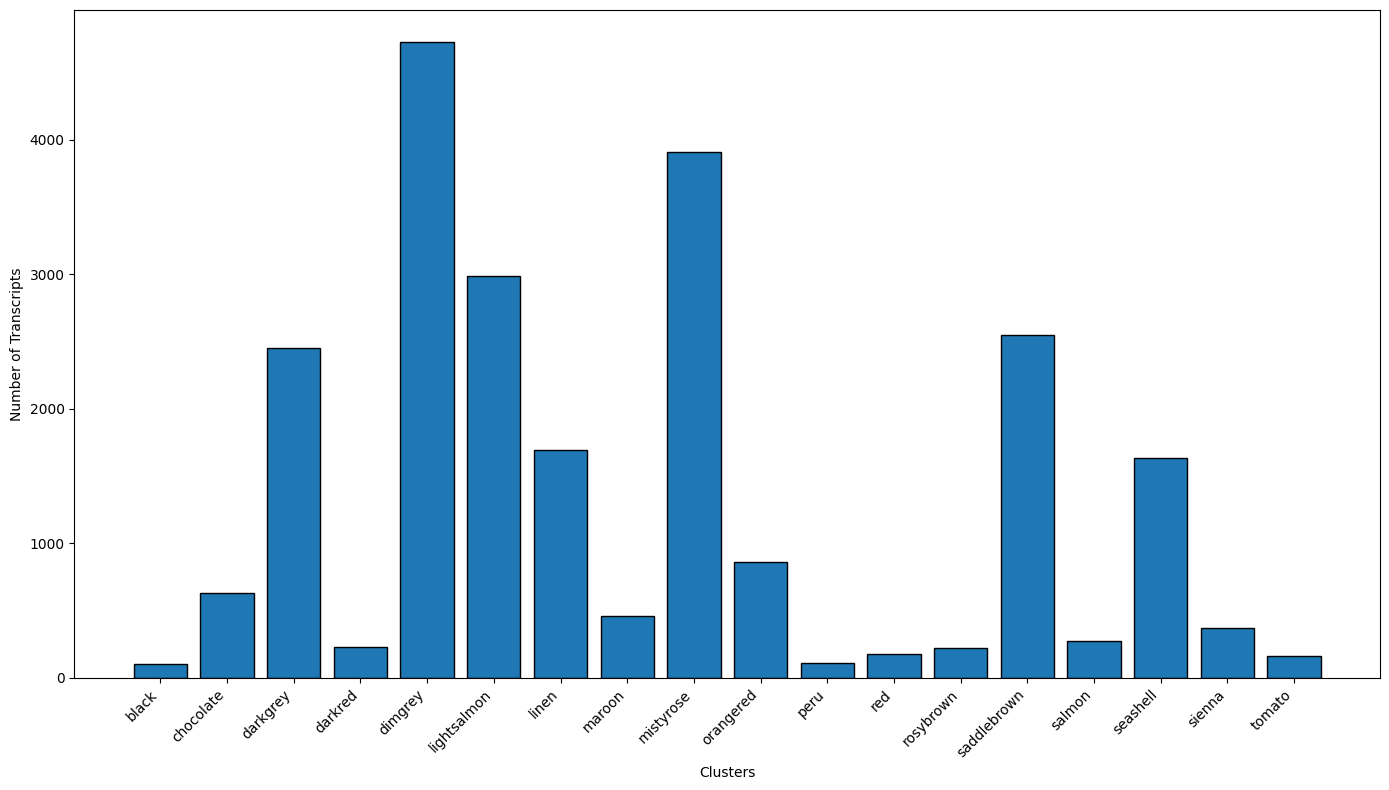

In [79]:
# Extracting keys and values for plotting
keys = list(clusters.keys())
values = [len(clusters[key]) for key in keys]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(keys, values, color='#1f77b4', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Number of Transcripts')
plt.xticks(rotation=45, ha="right")
#plt.title('Module Counts')
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()


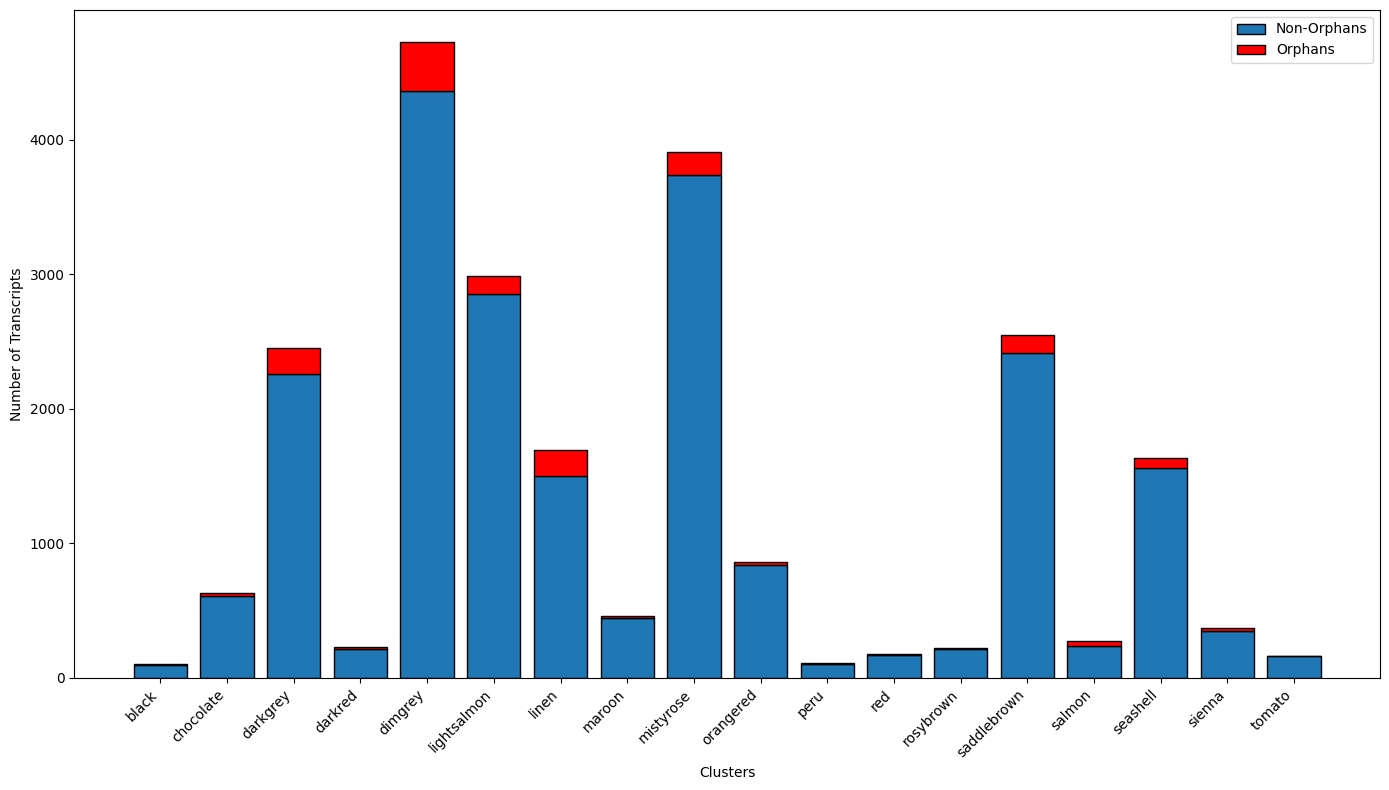

In [83]:
keys = list(clusters.keys())
total_values = [len(clusters[key]) for key in keys]
orphan_values = [orph_cluster[key] for key in keys]
non_orphan_values = [total - orphan for total, orphan in zip(total_values, orphan_values)]

plt.figure(figsize=(14, 8))

# plot non-orphans
plt.bar(keys, non_orphan_values, color='#1f77b4', edgecolor='black', label='Non-Orphans')

# plot orphans on top
plt.bar(keys, orphan_values, bottom=non_orphan_values, color='red', edgecolor='black', label='Orphans')

plt.xlabel('Clusters')
plt.ylabel('Number of Transcripts')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()